In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data = loadmat('ex3data1.mat')
X = data['X']
y= data['y']

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

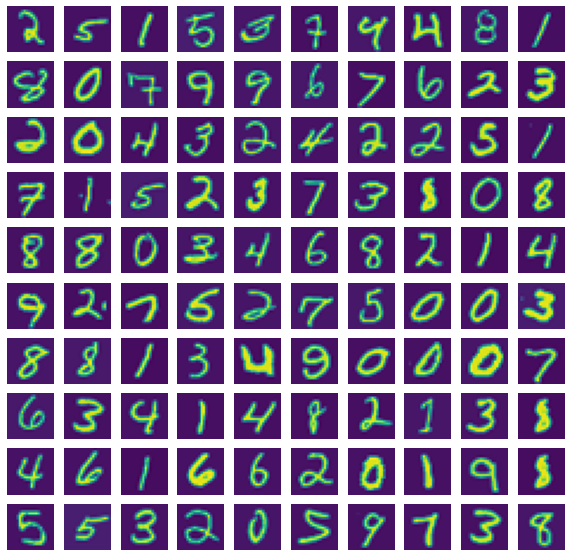

In [4]:
# Visualize the dataset
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i,j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20), order = 'F'))          
        axarr[i,j].axis('off')

In [5]:
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X)) # Add the intercept
(m,n) = X.shape

In [6]:
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

In [7]:
# Vectorized cost function
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid_function(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid_function(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [8]:
# Vectorized gradient
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid_function(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [9]:
# Optimizing the parameters

lmbda = 0.1
k = 10
theta = np.zeros((k,n))  # Inital parameters

for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.014010
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.056469
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061953
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037407
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063563
         Iterations: 50
         Function evaluations: 133
         Gradient evaluations: 133
         Current function value: 0.020031
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033895
      

In [10]:
# Accuracy score
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.04